# This is the part of the keras project dedicated to feature engineering and data cleaning

***It was necessary to start a new Jupyter notebook dedicated to this, because the previous was becoming a bit heavy , the python kernel stopped several times, and things got messy.***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('../DATA/lending_club_loan_two.csv')

In [3]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [5]:
df=df.drop(['emp_title', 'emp_length', 'title'], axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   home_ownership        396030 non-null  object 
 7   annual_inc            396030 non-null  float64
 8   verification_status   396030 non-null  object 
 9   issue_d               396030 non-null  object 
 10  loan_status           396030 non-null  object 
 11  purpose               396030 non-null  object 
 12  dti                   396030 non-null  float64
 13  earliest_cr_line      396030 non-null  object 
 14  open_acc              396030 non-null  float64
 15  

In [7]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']
def fill_mort_acc(total_acc,mort_acc):

    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [8]:
df=df.drop(['revol_util', 'pub_rec_bankruptcies'], axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            396030 non-null  float64
 1   term                 396030 non-null  object 
 2   int_rate             396030 non-null  float64
 3   installment          396030 non-null  float64
 4   grade                396030 non-null  object 
 5   sub_grade            396030 non-null  object 
 6   home_ownership       396030 non-null  object 
 7   annual_inc           396030 non-null  float64
 8   verification_status  396030 non-null  object 
 9   issue_d              396030 non-null  object 
 10  loan_status          396030 non-null  object 
 11  purpose              396030 non-null  object 
 12  dti                  396030 non-null  float64
 13  earliest_cr_line     396030 non-null  object 
 14  open_acc             396030 non-null  float64
 15  pub_rec          

In [10]:
df['term']=df['term'].apply(lambda x: int(x.split()[0]))

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            396030 non-null  float64
 1   term                 396030 non-null  int64  
 2   int_rate             396030 non-null  float64
 3   installment          396030 non-null  float64
 4   grade                396030 non-null  object 
 5   sub_grade            396030 non-null  object 
 6   home_ownership       396030 non-null  object 
 7   annual_inc           396030 non-null  float64
 8   verification_status  396030 non-null  object 
 9   issue_d              396030 non-null  object 
 10  loan_status          396030 non-null  object 
 11  purpose              396030 non-null  object 
 12  dti                  396030 non-null  float64
 13  earliest_cr_line     396030 non-null  object 
 14  open_acc             396030 non-null  float64
 15  pub_rec          

In [12]:
df=df.drop('grade', axis=1)

In [13]:
df=pd.concat([df, pd.get_dummies(df['sub_grade'], drop_first=True)], axis=1)

In [14]:
df=df.drop('sub_grade', axis=1)

In [15]:
df

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
396026,21000.0,36,12.29,700.42,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,RENT,56500.0,Verified,Oct-2013,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
396028,21000.0,60,15.31,503.02,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df=pd.concat([df, pd.get_dummies(df['verification_status'], drop_first=True)], axis=1)
df=df.drop('verification_status', axis=1)

In [17]:
df=pd.concat([df, pd.get_dummies(df['application_type'], drop_first=True)], axis=1)
df=df.drop('application_type', axis=1)

In [18]:
df=pd.concat([df, pd.get_dummies(df['initial_list_status'], drop_first=True)], axis=1)
df=df.drop('initial_list_status', axis=1)

In [19]:
df=pd.concat([df, pd.get_dummies(df['purpose'], drop_first=True)], axis=1)
df=df.drop('purpose', axis=1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 68 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   loan_amnt           396030 non-null  float64
 1   term                396030 non-null  int64  
 2   int_rate            396030 non-null  float64
 3   installment         396030 non-null  float64
 4   home_ownership      396030 non-null  object 
 5   annual_inc          396030 non-null  float64
 6   issue_d             396030 non-null  object 
 7   loan_status         396030 non-null  object 
 8   dti                 396030 non-null  float64
 9   earliest_cr_line    396030 non-null  object 
 10  open_acc            396030 non-null  float64
 11  pub_rec             396030 non-null  float64
 12  revol_bal           396030 non-null  float64
 13  total_acc           396030 non-null  float64
 14  mort_acc            396030 non-null  float64
 15  address             396030 non-nul

In [21]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [22]:
df=pd.concat([df, pd.get_dummies(df['home_ownership'], drop_first=True)], axis=1)
df=df.drop('home_ownership', axis=1)

In [23]:
df['zip_code']=df['address'].map(lambda x: int(x.split()[-1]))

In [24]:
df=df.drop('address', axis=1)

In [25]:
df=df.drop('issue_d', axis=1)

In [26]:
df['earliest_cr_year']=df['earliest_cr_line'].map(lambda x: int(x.split('-')[1]))

In [27]:
df=df.drop('earliest_cr_line', axis=1)

In [28]:
df=df.drop('loan_status', axis=1)

In [30]:
df=pd.concat([df, pd.get_dummies(df['zip_code'], drop_first=True)], axis=1)
df=df.drop('zip_code', axis=1)

In [33]:
tmp=pd.read_csv('../DATA/lending_club_loan_two.csv')

In [36]:
df=pd.concat([df, tmp[['pub_rec_bankruptcies', 'revol_util']]], axis=1)

In [39]:
df['loan_repaid']=tmp['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [44]:
df=df.dropna()

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [49]:
y.shape

(395219,)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
scaler = MinMaxScaler()

In [53]:
X_train = scaler.fit_transform(X_train)

In [54]:
X_test = scaler.transform(X_test)

In [55]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

/home/barbara/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/barbara/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/barbara/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/barbara/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:5

In [56]:
model = Sequential()


# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [57]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 316175 samples, validate on 79044 samples
Epoch 1/25
316175/316175 [==============================] - 11s 36us/sample - loss: 0.3006 - val_loss: 0.2641
Epoch 2/25
316175/316175 [==============================] - 10s 32us/sample - loss: 0.2657 - val_loss: 0.2628
Epoch 3/25
316175/316175 [==============================] - 4s 13us/sample - loss: 0.2632 - val_loss: 0.2623
Epoch 4/25
316175/316175 [==============================] - 5s 16us/sample - loss: 0.2618 - val_loss: 0.2621
Epoch 5/25
316175/316175 [==============================] - 5s 14us/sample - loss: 0.2610 - val_loss: 0.2626
Epoch 6/25
316175/316175 [==============================] - 5s 16us/sample - loss: 0.2604 - val_loss: 0.2624
Epoch 7/25
316175/316175 [==============================] - 4s 13us/sample - loss: 0.2601 - val_loss: 0.2616
Epoch 8/25
316175/316175 [==============================] - 5s 15us/sample - loss: 0.2596 

In [58]:
from tensorflow.keras.models import load_model

In [59]:
model.save('this_is_the_right_model.h5')

In [62]:
losses=pd.DataFrame(model.history.history)


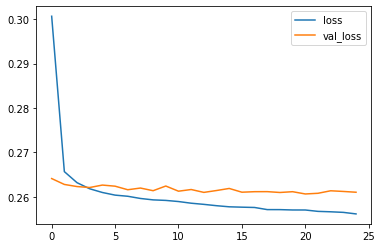

In [63]:
losses.plot()

In [64]:
from sklearn.metrics import classification_report, confusion_matrix

In [69]:
predictions=model.predict_classes(X_test)

In [70]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.44      0.98      0.61      7127
           1       1.00      0.88      0.93     71917

    accuracy                           0.89     79044
   macro avg       0.72      0.93      0.77     79044
weighted avg       0.95      0.89      0.91     79044



In [71]:
confusion_matrix(y_test,predictions)

array([[ 6949,  8709],
       [  178, 63208]])

In [75]:
import random
random.seed(101)
random_number=random.randint(0,len(df))

new_customer=df.drop('loan_repaid', axis=1).iloc[random_number]

In [83]:
new_customer=scaler.transform(new_customer.values.reshape(1,78))

In [88]:
model.predict_classes(new_customer)

array([[1]], dtype=int32)

In [89]:
df.loc[random_number]['loan_repaid']

1.0